### Naive Bayes

There are three kinds of naive Bayes classifiers implemented in scikit-learn, **`GaussianNB`**, **`BernoulliNB`** and **`MultinomialNB`**.
**`GaussianNB`** can be applied to any continuous data, while **`BernoulliNB`** assumes binary data and **`MultinomialNB`** assumes count data (that is each feature represents an integer count of something, like how often a word appears in a sentence). **`BernoulliNB`** and **`MultinomialNB`** are mostly used in text data classification,

### Gaussian NB

In [1]:
# a complete example of Supervised learning: Iris classifcation

import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict 

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [2]:
model.score(Xtest, ytest)

0.9736842105263158

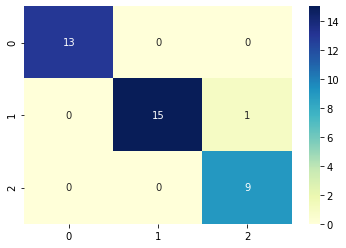

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
comat = confusion_matrix(ytest, y_model)
sns.heatmap(comat, annot = True, fmt='d', cbar = True, cmap = 'YlGnBu')

In [4]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Naive Bayes Classification for Handwritten Digits Dataset

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [7]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=1)

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)

In [9]:
model.class_count_, model.class_prior_, model.classes_

(array([125., 140., 136., 131., 134., 143., 138., 131., 137., 132.]),
 array([0.09279881, 0.10393467, 0.10096511, 0.09725316, 0.09948033,
        0.10616184, 0.10244989, 0.09725316, 0.1017075 , 0.09799555]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [10]:
print(list(zip(ytest[:15],y_predict[:15])))

[(1, 1), (5, 5), (0, 0), (7, 7), (1, 1), (0, 0), (6, 6), (1, 1), (5, 5), (4, 4), (9, 9), (2, 8), (7, 7), (8, 8), (4, 4)]


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,ytest)

0.8533333333333334

In [14]:
model.score(Xtest, ytest), model.score(Xtrain, ytrain)

(0.8533333333333334, 0.8737936154417223)

In [12]:
n = 0
for i,j in zip(ytest, y_predict):
    if i != j:
        n = n+1
print(n)  

66


In [16]:
(450-66)/450

0.8533333333333334

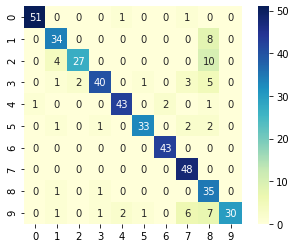

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_predict)
sns.heatmap(mat,square=True, annot=True, fmt='d', cmap = 'YlGnBu',cbar=True)

Above heatmap nicely illustrates the results of classification. The diagonal blocks (shown in dark colors) represents perfectly matched instances. All other blocks show the degree of confusion. For example, there has been one instance where 1 has been wrongly classified as 9. Similarily, 8 has been wrongly classified as 2 in 10 numbers of instances.

### Multinomial NB

In [14]:
%pprint
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

Pretty printing has been turned OFF


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

In [15]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [16]:
len(data.filenames),len(data.target), len(data.data), max(data.target), data.filenames[0]

(11314, 11314, 11314, 19, '/Users/user/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994')

In [17]:
len(data.target_names)

20

In [18]:
print(data.data[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [19]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [20]:
len(train.data), len(test.data)

(2153, 1432)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [22]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

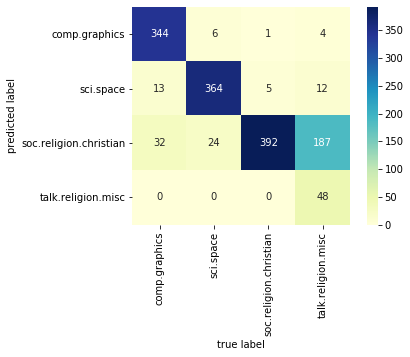

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap ='YlGnBu',
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(test.target,labels))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432

